In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
import pickle

In [76]:
# reading the data 
walletdata = pd.read_csv("WalletHubData.csv")

In [77]:
walletdata.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,...,5206,0.9339,1,1,1,0,NaN,0,NaN,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,...,0,NaN,0,0,0,0,NaN,0,NaN,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,...,0,NaN,1,1,1,0,NaN,0,NaN,526
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,...,0,NaN,0,0,0,0,NaN,0,NaN,496


In [78]:
walletdata1 = walletdata[0:10000]

In [79]:
walletdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 305 entries, x001 to y
dtypes: float64(41), int64(264)
memory usage: 23.3 MB


In [80]:
#checking the number NAN values in the data frame
isnullarray1 = walletdata1.isnull().sum()

In [81]:
max(isnullarray1)

9343

In [82]:
#Here we retain onle those attributes that have less tha 50% NAN values in their records
walletdata2 = walletdata1.loc[:, walletdata1.isnull().mean() <= .5]

In [83]:
walletdata2.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,...,5206,5206,0,5206,1,1,1,0,0,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,...,57762,57762,57762,0,1,1,1,0,0,526
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,496


In [84]:
walletdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 286 entries, x001 to y
dtypes: float64(22), int64(264)
memory usage: 21.8 MB


In [85]:
nanlist2 = walletdata1.isnull().sum()

In [86]:
max(nanlist2)

9343

In [87]:
walletdata2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x001,10000.0,1.212963e+06,275261.501036,517.0,969324.5,1229200.5,1440546.5,1677188.0
x002,7853.0,1.254507e+02,115.361099,0.0,31.0,100.0,180.0,670.0
x003,7853.0,2.498854e+01,47.226186,0.0,3.0,7.0,24.0,565.0
x004,7854.0,6.492399e+01,62.464663,0.0,18.0,47.0,92.0,565.0
x005,9418.0,1.768714e+02,123.795343,0.0,86.0,149.0,245.0,682.0
...,...,...,...,...,...,...,...,...
x299,10000.0,5.566000e-01,0.496811,0.0,0.0,1.0,1.0,1.0
x300,10000.0,5.813000e-01,0.493371,0.0,0.0,1.0,1.0,1.0
x301,10000.0,1.023000e-01,0.303058,0.0,0.0,0.0,0.0,1.0
x303,10000.0,6.274690e+03,22931.663596,0.0,0.0,0.0,0.0,614125.0


In [88]:
#walletdata1.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [89]:
#Here we replace all the NAN values in the columns with the corresponding median values of the columns
walletdata2.fillna(walletdata2.median(),inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [90]:
walletdata2.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1540332,100.0,7.0,47.0,8.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,...,5206,5206,0,5206,1,1,1,0,0,558
2,1089795,100.0,7.0,47.0,96.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,...,57762,57762,57762,0,1,1,1,0,0,526
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,496


In [91]:
#Rechecking if the NAN values have been replaced by the median of the corresponding column
isnullist3 = walletdata2.isnull().sum()

In [92]:
min(isnullist3)

0

In [93]:
walletdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 286 entries, x001 to y
dtypes: float64(22), int64(264)
memory usage: 21.8 MB


In [94]:
#final data set

In [95]:
walletdata2.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,...,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.212963e+06,119.986400,21.126400,61.077500,175.249300,0.312900,0.711100,1.41820,1.194100,1.02230,...,1.441506e+04,5.836892e+04,2860.103600,1.155495e+04,0.543700,0.556600,0.581300,0.102300,6274.690500,618.761800
std,2.752615e+05,102.761141,42.496826,55.844168,120.315625,0.463697,1.356326,2.35747,2.038244,1.72061,...,3.579116e+04,1.761384e+05,12861.382083,3.326699e+04,0.498112,0.496811,0.493371,0.303058,22931.663596,118.384007
min,5.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000
25%,9.693245e+05,46.000000,4.000000,25.000000,91.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,523.000000
50%,1.229200e+06,100.000000,7.000000,47.000000,149.000000,0.000000,0.000000,1.00000,0.000000,0.00000,...,0.000000e+00,4.864500e+03,0.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,600.000000
75%,1.440546e+06,151.000000,17.000000,77.000000,236.000000,1.000000,1.000000,2.00000,2.000000,1.00000,...,1.684050e+04,4.366125e+04,0.000000,1.269925e+04,1.000000,1.000000,1.000000,0.000000,0.000000,717.000000
max,1.677188e+06,670.000000,565.000000,565.000000,682.000000,1.000000,20.000000,60.00000,45.000000,26.00000,...,1.827343e+06,8.608320e+06,285258.000000,1.827343e+06,1.000000,1.000000,1.000000,1.000000,614125.000000,839.000000


In [96]:
max(walletdata2['y'])

839

In [97]:
min(walletdata2['y'])

300

In [98]:
walletdata2['y'].dtypes

dtype('int64')

In [99]:
#walletdata1.hist(bins=50, figsize = (100,100))

In [100]:
corr1 = walletdata2.corr().abs()
#sns.heatmap(corr1, annot = True, cmap = plt.cm.Reds)
corr1

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
x001,1.000000,0.091127,0.034275,0.087699,0.119997,0.003450,0.002413,0.048618,0.039629,0.007812,...,0.008814,0.053530,0.002052,0.008690,0.012798,0.008028,0.004060,0.034155,0.006650,0.158974
x002,0.091127,1.000000,0.291328,0.834907,0.724038,0.092417,0.094230,0.114811,0.055899,0.004914,...,0.081943,0.212742,0.006165,0.090544,0.058678,0.060779,0.058115,0.061912,0.032228,0.473928
x003,0.034275,0.291328,1.000000,0.694921,0.231909,0.192911,0.218188,0.225619,0.151984,0.114731,...,0.091216,0.043447,0.015044,0.092321,0.181896,0.178968,0.174355,0.006820,0.039293,0.171381
x004,0.087699,0.834907,0.694921,1.000000,0.617895,0.184478,0.230932,0.260134,0.171845,0.096369,...,0.013418,0.118569,0.004115,0.012845,0.169309,0.169781,0.162944,0.042910,0.003120,0.427066
x005,0.119997,0.724038,0.231909,0.617895,1.000000,0.117827,0.048345,0.058676,0.023411,0.035074,...,0.063994,0.208841,0.028021,0.079683,0.049488,0.050794,0.051732,0.091599,0.002087,0.580418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x299,0.008028,0.060779,0.178968,0.169781,0.050794,0.005383,0.224708,0.264136,0.287267,0.266034,...,0.358397,0.126136,0.197670,0.309169,0.974273,1.000000,0.950879,0.142545,0.243289,0.050257
x300,0.004060,0.058115,0.174355,0.162944,0.051732,0.007044,0.218258,0.258644,0.284602,0.266769,...,0.341604,0.122057,0.188686,0.294576,0.926415,0.950879,1.000000,0.156738,0.231880,0.048691
x301,0.034155,0.061912,0.006820,0.042910,0.091599,0.009321,0.005220,0.000255,0.010594,0.031874,...,0.157836,0.019038,0.242998,0.075866,0.139653,0.142545,0.156738,1.000000,0.267088,0.230549
x303,0.006650,0.032228,0.039293,0.003120,0.002087,0.018111,0.101930,0.105634,0.118768,0.137410,...,0.667949,0.152351,0.464314,0.539122,0.249402,0.243289,0.231880,0.267088,1.000000,0.028473


In [101]:
#Here we plot the boxplot for all the attributes of the dataframe walletdata1

#def drawBox(data, plot_method = sns.distplot):
#    n = int((data.columns.size)/4)+1
#    f, axes = plt.subplots(n,4, figsize = (100,100))
#    row = 0
#    colval = 0
#    for col in data.columns:
#        plot_method(data[col], ax = axes[row, colval],)
#        colval = colval+1
#        if(colval%4 == 0):
#            colval = 0
#            row = row+1
        

In [102]:
#drawBox(walletdata1, sns.boxplot)

In [103]:
#Function to prune the outlier
def outlier_pruning(col, outlier_pruned_df):
    iqr = outlier_pruned_df[col].quantile(0.75)-outlier_pruned_df[col].quantile(0.25)
    iqr = iqr*1.5
#    print('IQR for '+col+':', iqr)
    lower_quartile = outlier_pruned_df[col].quantile(0.25) - iqr
    upper_quartile = outlier_pruned_df[col].quantile(0.75) + iqr
    outlier_pruned_df[col].loc[outlier_pruned_df[col]<lower_quartile] = np.NAN
    outlier_pruned_df[col] = outlier_pruned_df[col].fillna(value = lower_quartile, axis = 0)
    outlier_pruned_df[col].loc[outlier_pruned_df[col] > upper_quartile] = np.NAN
    outlier_pruned_df[col] = outlier_pruned_df[col].fillna(value = upper_quartile, axis = 0)

In [104]:
columns = list(walletdata2.columns.values)
#print(columns)

In [105]:
walletdata3 = walletdata2.copy()
for col in columns:
    outlier_pruning(col,walletdata3)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [106]:
#def remove_outlier(df_in, col_name):
#    df_out = pd.DataFrame()
#    q1 = df_in[col_name].quantile(0.25)
#    q3 = df_in[col_name].quantile(0.75)
#    iqr = q3-q1 #Interquartile range
#    fence_low  = q1-1.5*iqr
#    fence_high = q3+1.5*iqr
#    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#    print(df_out)
#    return df_out

In [107]:
#def remove_outlier(df_in, col_name):
#    df_out = pd.DataFrame()
#    q1 = df_in[col_name].quantile(0.25)
#    q3 = df_in[col_name].quantile(0.75)
#    iqr = q3-q1 #Interquartile range
#    fence_low  = q1-1.5*iqr
#    fence_high = q3+1.5*iqr
#    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#    print(df_out)
#    return df_out

In [108]:
#walletdata3 = walletdata2.copy()
#for col in columns:
#    remove_outlier(walletdata3,col)

In [109]:
walletdata3.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
0,1540332.0,100.0,7.0,47.0,8.0,1.0,0.0,1.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,706.0
1,823066.0,4.0,3.0,3.0,4.0,0.0,2.0,2.0,0.0,0.0,...,5206.00,5206.0,0.0,5206.0,1.0,1.0,1.0,0.0,0.0,558.0
2,1089795.0,100.0,7.0,47.0,96.0,1.0,0.0,0.0,0.0,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,577.0
3,1147758.0,63.0,14.0,38.0,258.0,0.0,0.0,0.0,1.0,2.0,...,42101.25,57762.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,526.0
4,1229670.0,34.0,25.0,29.0,34.0,1.0,0.0,0.0,0.0,2.5,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0


In [110]:
walletdata2.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,...,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.212963e+06,119.986400,21.126400,61.077500,175.249300,0.312900,0.711100,1.41820,1.194100,1.02230,...,1.441506e+04,5.836892e+04,2860.103600,1.155495e+04,0.543700,0.556600,0.581300,0.102300,6274.690500,618.761800
std,2.752615e+05,102.761141,42.496826,55.844168,120.315625,0.463697,1.356326,2.35747,2.038244,1.72061,...,3.579116e+04,1.761384e+05,12861.382083,3.326699e+04,0.498112,0.496811,0.493371,0.303058,22931.663596,118.384007
min,5.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000
25%,9.693245e+05,46.000000,4.000000,25.000000,91.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,523.000000
50%,1.229200e+06,100.000000,7.000000,47.000000,149.000000,0.000000,0.000000,1.00000,0.000000,0.00000,...,0.000000e+00,4.864500e+03,0.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,600.000000
75%,1.440546e+06,151.000000,17.000000,77.000000,236.000000,1.000000,1.000000,2.00000,2.000000,1.00000,...,1.684050e+04,4.366125e+04,0.000000,1.269925e+04,1.000000,1.000000,1.000000,0.000000,0.000000,717.000000
max,1.677188e+06,670.000000,565.000000,565.000000,682.000000,1.000000,20.000000,60.00000,45.000000,26.00000,...,1.827343e+06,8.608320e+06,285258.000000,1.827343e+06,1.000000,1.000000,1.000000,1.000000,614125.000000,839.000000


In [111]:
#Here we see that the minimum and the maximum of the original data walletdat
#which is now walletdat3 is changed
walletdata3.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x291,x292,x294,x296,x298,x299,x300,x301,x303,y
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000
mean,1.213521e+06,114.049100,12.157200,56.975500,172.921550,0.312900,0.567450,1.22490,1.065500,0.764950,...,10070.95265,28685.210350,0.0,7302.424163,0.543700,0.556600,0.581300,0.0,0.0,618.761800
std,2.731509e+05,86.090632,12.009064,42.660775,113.597375,0.463697,0.840325,1.54931,1.448454,0.942956,...,14445.59904,40949.527012,0.0,11195.386213,0.498112,0.496811,0.493371,0.0,0.0,118.384007
min,2.624915e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,300.000000
25%,9.693245e+05,46.000000,4.000000,25.000000,91.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,523.000000
50%,1.229200e+06,100.000000,7.000000,47.000000,149.000000,0.000000,0.000000,1.00000,0.000000,0.000000,...,0.00000,4864.500000,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.0,600.000000
75%,1.440546e+06,151.000000,17.000000,77.000000,236.000000,1.000000,1.000000,2.00000,2.000000,1.000000,...,16840.50000,43661.250000,0.0,12699.250000,1.000000,1.000000,1.000000,0.0,0.0,717.000000
max,1.677188e+06,308.500000,36.500000,155.000000,453.500000,1.000000,2.500000,5.00000,5.000000,2.500000,...,42101.25000,109153.125000,0.0,31748.125000,1.000000,1.000000,1.000000,0.0,0.0,839.000000


In [112]:
#walletdata2 = walletdata2[walletdata2.between(walletdata2.quantile(.25), walletdata2.quantile(.75))] 

In [113]:
from scipy import stats

In [114]:
#walletdata3=walletdata3[(np.abs(stats.zscore(walletdata3))<3).all(axis=1)]

In [115]:
def build_model(model,X,y,type):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    coeff_algo = ['ridge','lasso','regression']
    print('Mean_Absoulte_Error:', mean_absolute_error(y_predict,y_test))
    print('Mean_Squared_Error:', mean_squared_error(y_predict,y_test))
    print('Median_Absoulte_Error:', median_absolute_error(y_predict,y_test))
    r2score = r2_score(y_predict,y_test)
    print('r2score:', r2score)
    adj_r2score = 1 - (1 - r2score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    print('Adjusted r2 score:', adj_r2score)
    print('Model score - Test set:', model.score(X_test,y_test))
    print('Model score - Train set:', model.score(X_train,y_train))
    print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test,y_predict)))
    
    if(type == 'svm'):
        sns.set(style = "darkgrid", color_codes = 'True')
        with sns.axes_style("white"):
            sns.jointplot(x=y_test,y=y_predict, kind = "reg", color = "k")
    elif(type == 'lasso' or type == 'ridge'):
        print(model.coef_)
        
    if(type in coeff_algo):
        plt.figure(figsize = (200,100))
        plt.subplot(212)
        print('Feature Coefficients')
        coef = pd.DataFrame(model.coef_)
        coef["feat"] = X.columns
        
        ax2 = sns.barplot(coef["feat"], coef[0], palette = 'jet_r', linewidth =2 )
        plt.xlabel("features")
        plt.ylabel("coefficients")
        plt.title('Feature Coefficients')
        
    elif(type != 'svm' and type != 'poly'):
        plt.figure(figsize = (45,25))
        plt.subplot(212)
        print('Feature Importance')
        coef = pd.DataFrame(model.feature_importances_)
        coef["feat"] = X.columns
        ax2 = sns.barplot(coef["feat"], coef[0], palette = 'jet_r', linewidth =2 )
        plt.xlabel("features")
        plt.ylabel("feature importance")
        plt.title("Feature importances")
              

In [116]:
X = walletdata3.drop('y', axis = 1)
y = walletdata3['y']

In [117]:
X.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x290,x291,x292,x294,x296,x298,x299,x300,x301,x303
0,1540332.0,100.0,7.0,47.0,8.0,1.0,0.0,1.0,0.0,0.0,...,25.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,823066.0,4.0,3.0,3.0,4.0,0.0,2.0,2.0,0.0,0.0,...,25.0,5206.00,5206.0,0.0,5206.0,1.0,1.0,1.0,0.0,0.0
2,1089795.0,100.0,7.0,47.0,96.0,1.0,0.0,0.0,0.0,1.0,...,25.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1147758.0,63.0,14.0,38.0,258.0,0.0,0.0,0.0,1.0,2.0,...,25.0,42101.25,57762.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1229670.0,34.0,25.0,29.0,34.0,1.0,0.0,0.0,0.0,2.5,...,25.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
from math import sqrt

In [119]:
build_model(LinearRegression(), X, y, 'regression')

Mean_Absoulte_Error: 33.150311783061476
Mean_Squared_Error: 1824.7404619460556
Median_Absoulte_Error: 27.335203484119916
r2score: 0.8504551251581378
Adjusted r2 score: 0.8460676133885341
Model score - Test set: 0.870926163983589
Model score - Train set: 0.8662474986832887
Root Mean Squared Error: 42.716980955423985
Feature Coefficients


MemoryError: In RendererAgg: Out of memory

<Figure size 14400x7200 with 1 Axes>

In [120]:
#poly = PolynomialFeatures(degree = 2, interaction_only = True)
#X_scaled = poly.fit_transform(X)
#build_model(LinearRegression(),X_scaled,y,'poly')

Mean_Absoulte_Error: 101.46063025048565
Mean_Squared_Error: 14636.633524530798
Median_Absoulte_Error: 89.42307692307475
r2score: -104699817.49275748
Adjusted r2 score: -107771615.74995697
Model score - Test set: -0.035328845266457076
Model score - Train set: 0.04248843541788361
Root Mean Squared Error: 120.98195536744642


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


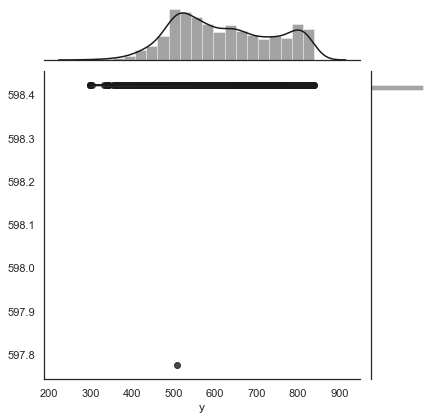

In [121]:
model = svm.SVR(C=5, kernel = 'rbf', gamma = 0.025)
build_model(model, X, y, 'svm')

In [122]:
ridge = Ridge(alpha = 3)
build_model(ridge, X, y,'ridge')

Mean_Absoulte_Error: 33.15647876164592
Mean_Squared_Error: 1825.143099036716
Median_Absoulte_Error: 27.339110518337634
r2score: 0.850351988456268
Adjusted r2 score: 0.8459614507488392
Model score - Test set: 0.870897683268168
Model score - Train set: 0.8662452941341218
Root Mean Squared Error: 42.72169354129955
[ 7.88298433e-06 -1.09384652e-01  4.11182652e-01  1.30552462e-01
  9.40791574e-02  5.17938180e+00  2.99816185e+00  1.28901424e+00
  9.42723996e-01  1.89755184e+00  9.84690809e-01  1.40149802e+00
  1.21257446e+00  5.16002036e-01 -1.34996373e+00  4.06032841e-01
  1.15322673e+00 -1.60692438e+00  8.03747614e+00  9.86409630e-01
  5.39337635e-01  1.64810010e+01 -1.29491890e+01  7.16321504e-01
  9.50632669e+00  1.17606298e+01  0.00000000e+00 -9.27726380e+00
 -1.70294476e+00 -2.06649668e-01 -9.12043542e-02  0.00000000e+00
  2.60849344e+00 -1.65966017e+00 -1.68811015e-01 -2.58795841e+00
  0.00000000e+00  1.45580536e+00  1.37262795e+00 -1.90699641e+00
 -2.24790496e+01 -9.10243976e-04  1.5

MemoryError: In RendererAgg: Out of memory

<Figure size 14400x7200 with 1 Axes>

Mean_Absoulte_Error: 39.86528290331941
Mean_Squared_Error: 2369.9192809593987
Median_Absoulte_Error: 34.45363908275175
r2score: 0.7202686966848549
Adjusted r2 score: 0.7120616325048243
Model score - Test set: 0.8323626953958962
Model score - Train set: 0.8365162491111302
Root Mean Squared Error: 48.68181673848459
Feature Importance


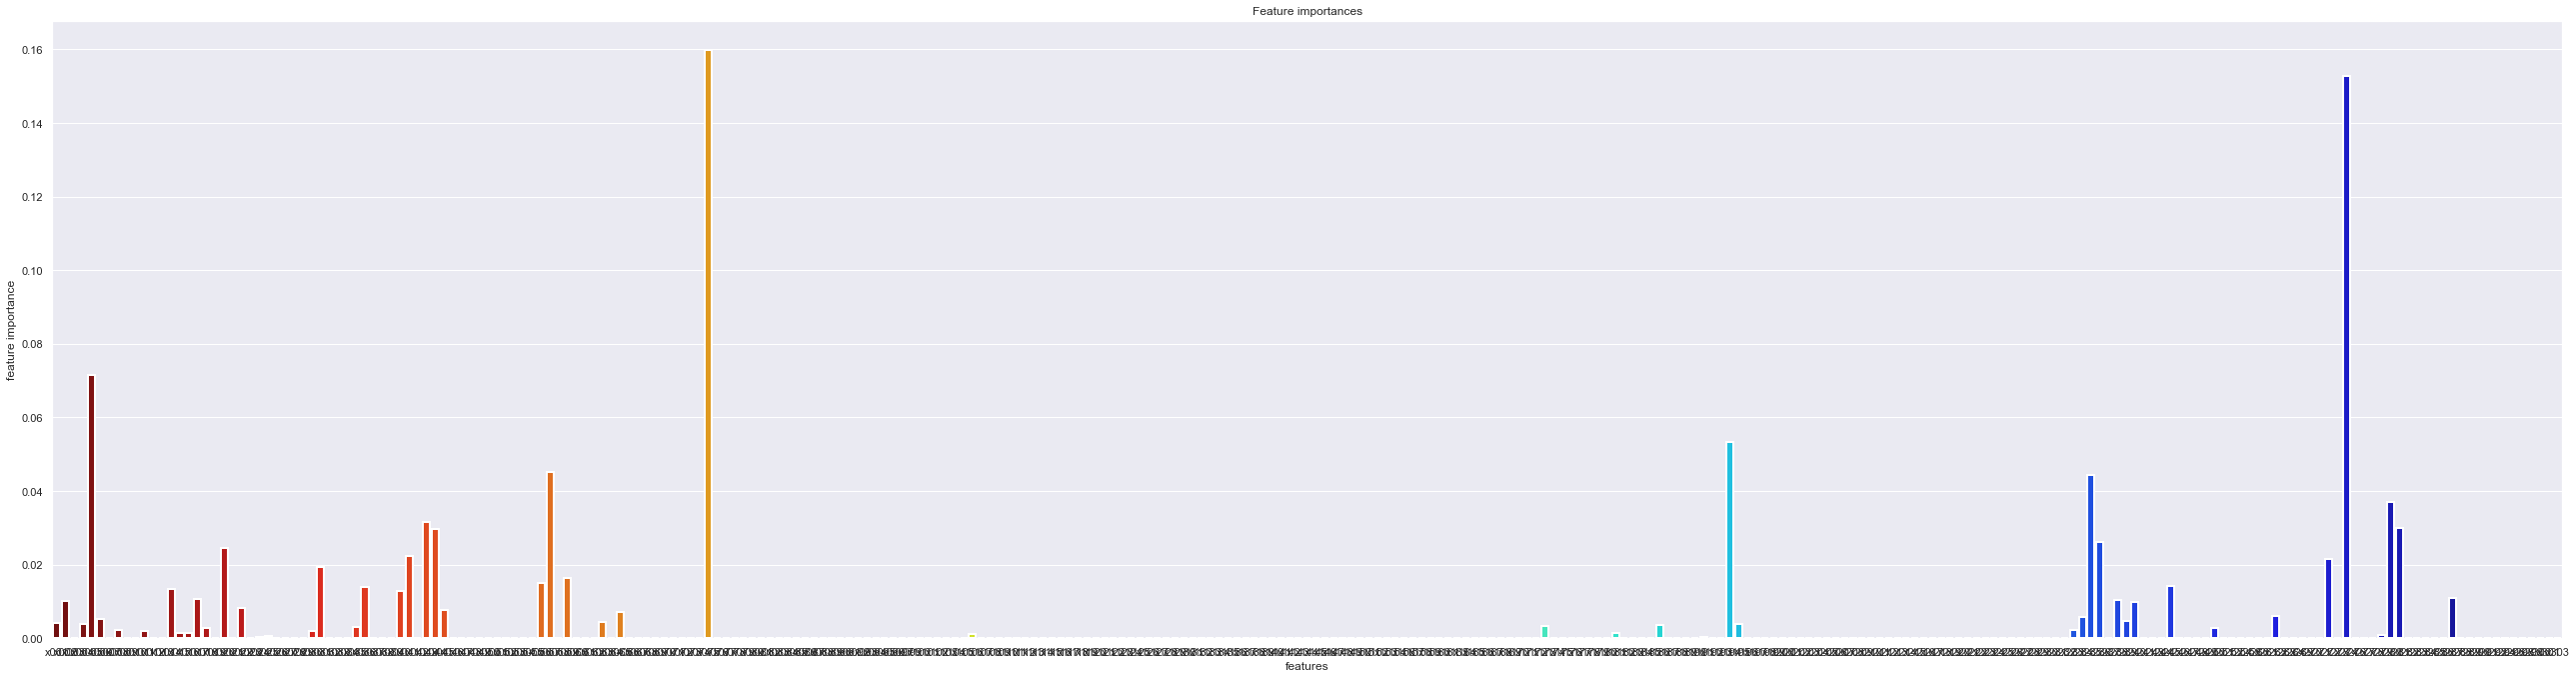

In [123]:
# AdaBoost regressor
regressor = AdaBoostRegressor()
build_model(regressor, X,y,'ada-boost')


Mean_Absoulte_Error: 26.755703665149078
Mean_Squared_Error: 1298.5749473745689
Median_Absoulte_Error: 20.322800106205136
r2score: 0.8980801817939612
Adjusted r2 score: 0.8950899462381942
Model score - Test set: 0.9081447179432361
Model score - Train set: 0.9261353793720472
Root Mean Squared Error: 36.035745411668245
Feature Importance


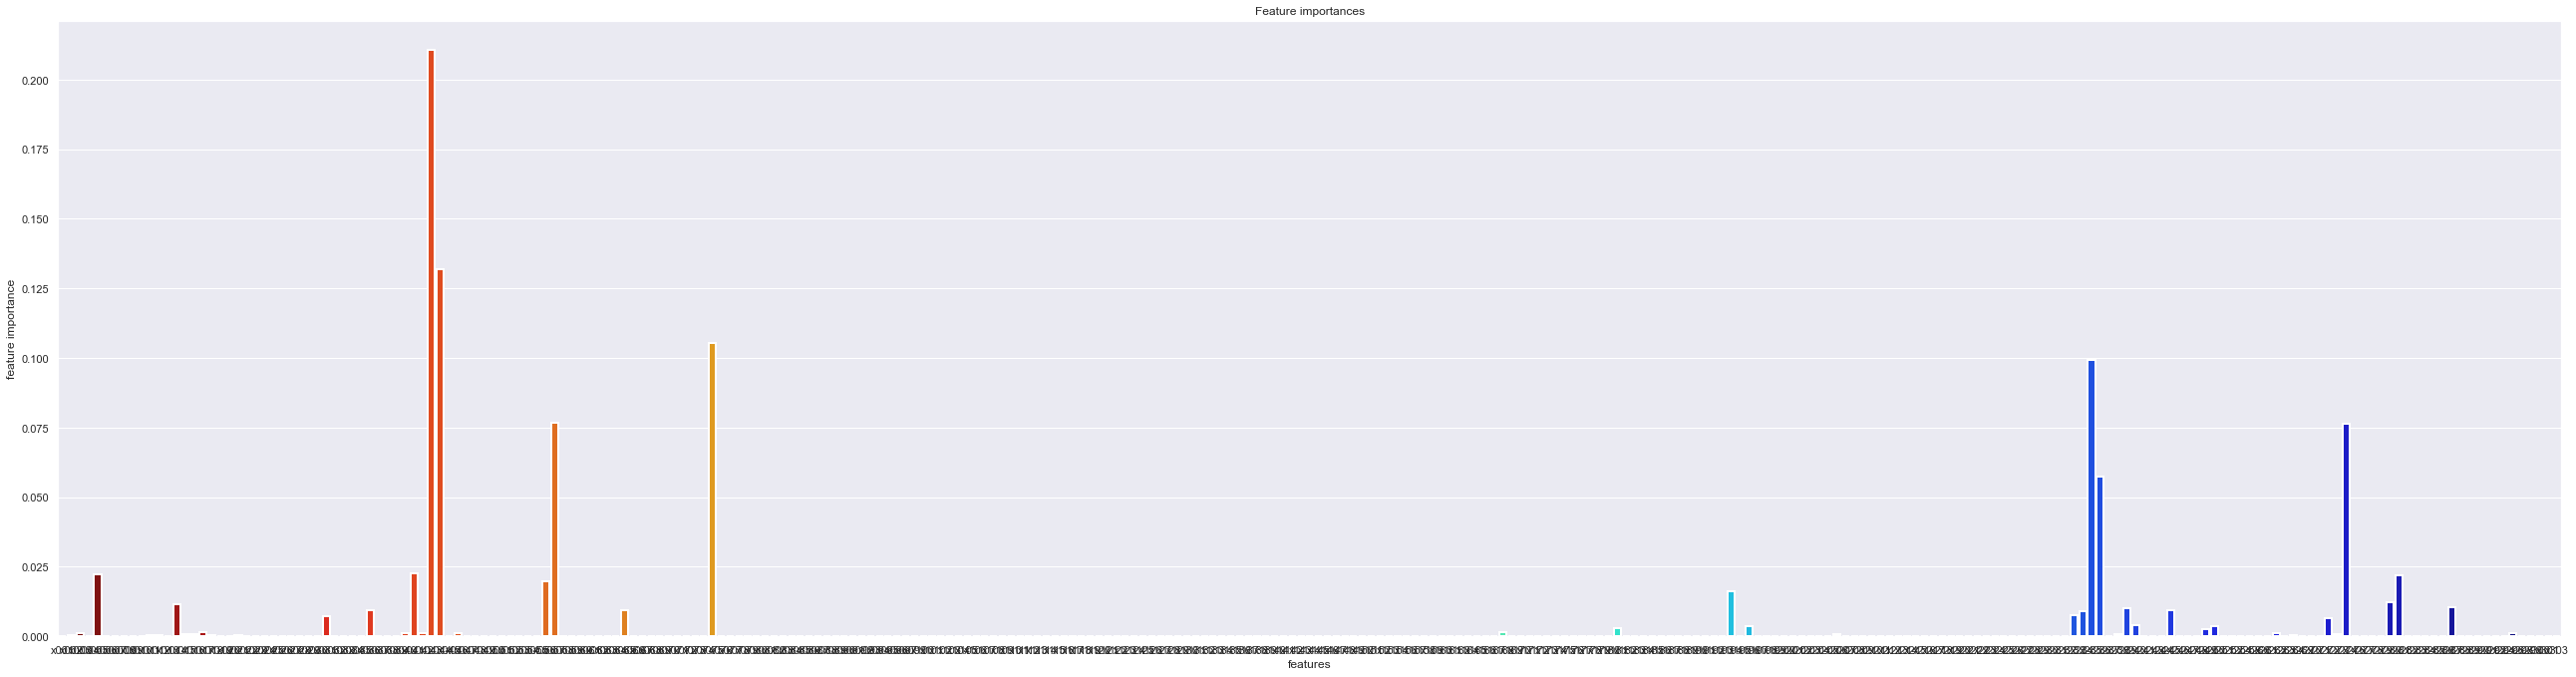

In [124]:
#GradientBoost regressor
gb_regressor = GradientBoostingRegressor()
build_model(gb_regressor, X,y,'gradeint-boost')

Mean_Absoulte_Error: 25.812556666666662
Mean_Squared_Error: 1265.6239960333332
Median_Absoulte_Error: 18.94500000000005
r2score: 0.8974320650836201
Adjusted r2 score: 0.8944228143680376
Model score - Test set: 0.9104755182837226
Model score - Train set: 0.9872460300043568
Root Mean Squared Error: 35.57560956657431
Feature Importance


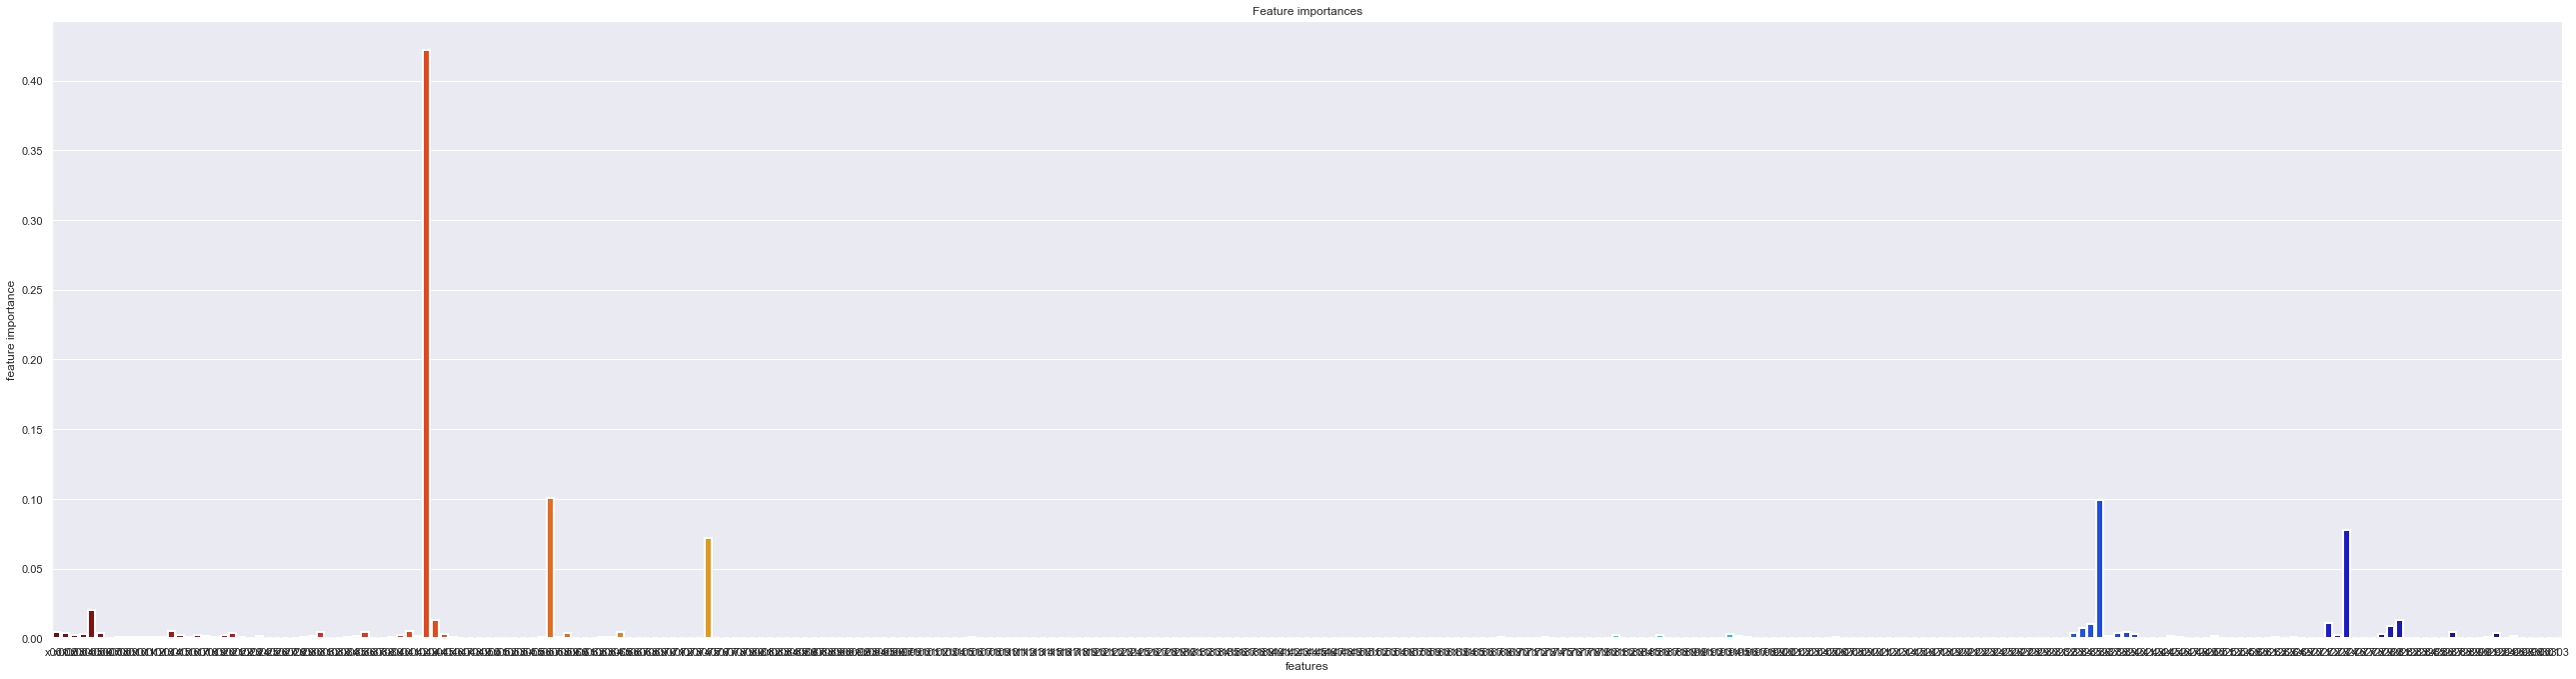

In [125]:
forest_regressor = RandomForestRegressor()
build_model(forest_regressor,X,y,'random-forest')

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
grid_GBR = GridSearchCV(estimator = gb_regressor, param_grid = parameters, cv = 2, n_jobs = -1)
grid_GBR.fit(X_train,y_train)
print("results from GridSearchCV")
print(grid_GBR.best_estimator_)
print("The best score:", grid_GBR.best_score_)
print("The best parameters:", grid_GBR.best_params_)

In [ ]:
pd.DataFrame(zip(names,gb_regressor.coef[0].tolist()),columns= ["names","coefficient"])